# **DEEP NEURAL NETWORK ON MNIST USING KERAS**

In this exercise, we will perform a multiclass classification by implementing a deep neural network (multi-layer) for the MNIST dataset.

Import the required libraries and packages:

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Import Keras libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

Load and normalize the MNIST data:

In [2]:
mnist = tf.keras.datasets.mnist
(train_features, train_labels), (test_features, test_labels) = mnist.load_data()
# Normalize the training data
train_features, test_features = train_features / 255.0, test_features / 255.0

Build the sequential model:

In [3]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [4]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 40,480
Trainable params: 40,480
Non-trainable params: 0
_________________________________________________________________


Train the model:

In [5]:
model.fit(train_features, train_labels, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3558 - accuracy: 0.8963
Epoch 2/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1601 - accuracy: 0.9524
Epoch 3/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1225 - accuracy: 0.9642
Epoch 4/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0992 - accuracy: 0.9698
Epoch 5/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0832 - accuracy: 0.9746
Epoch 6/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0718 - accuracy: 0.9777
Epoch 7/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0617 - accuracy: 0.9806
Epoch 8/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0538 - accuracy: 0.9834
Epoch 9/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0492 - accuracy: 0.9842
Epoch 10/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.043

Test the model:

In [6]:
model.evaluate(test_features, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.2266 - accuracy: 0.9736


[0.2266429215669632, 0.9735999703407288]

Load a random image from a test dataset:

In [7]:
loc = 200
test_image = test_features[loc].reshape(1, 28, 28)

In [8]:
result = model.predict(test_image)
print(result)

[[1.88080648e-26 3.14785793e-35 1.02946525e-26 1.00000000e+00
  0.00000000e+00 2.60156202e-11 6.20911914e-23 0.00000000e+00
  2.24952384e-15 1.63773567e-19]]


The position of the highest value will be the prediction.

In [9]:
result.argmax()

3

In [10]:
test_labels[loc]

3

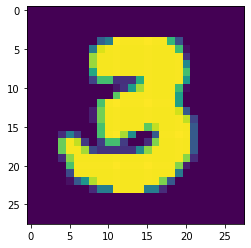

In [11]:
plt.imshow(test_features[loc]);